## PHYS-243 Spring 2019 - Brandon Evans - Homework 5
#### Dr. Mobasher, TA Abtin Shahidi <br> 10-Jun-2019<br>
Reusing some of my Pandas code developed during midterm assignment


In [2]:
#Data science greatest hits
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy.stats import zscore
%matplotlib inline

##### Dataset info
```
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
```

#### Data Load/Prep

In [60]:
TRAIN_FILE = 'adult.data'
TEST_FILE = 'adult.test'

#Labels weren't provided as header in data
labels = 'age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,' \
    'capital_gain,capital_loss,hours_week,native_country,income'

#Pandas is picky and wants labels as string array
label_array = labels.split(",")

#Load data in Pandas dataframe
train = pd.read_csv(TRAIN_FILE, delimiter=',', header=None, names=label_array)
test = pd.read_csv(TEST_FILE, delimiter=',', header=None, names=label_array, skiprows=1)

#### Preview Data

In [102]:
train.head()
#test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [103]:
train.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education         32561 non-null int64
education_num     32561 non-null int64
marital_status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_week        32561 non-null int64
native_country    32561 non-null int64
income            32561 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [104]:
train.describe()
#test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [66]:
#Any null values?
print("Missing Data Training Rows: {}".format(train.isnull().sum().sum()))
print("Missing Data Test Rows: {}".format(test.isnull().sum().sum()))
#I tested this function by adding a row with a deliberate missing field and it caught errors.

Missing Data Training Rows: 0
Missing Data Test Rows: 0


In [75]:
#RandomForest would not accept string data
def encodeLabelDataset(dataset,labels):
    dictLabels = dict()
    for label in labels_needed:
        dictLabels[label] = LabelEncoder()
        dictLabels[label].fit(dataset[label])
        dataset[label] = dictLabels[label].transform(dataset[label])
    return dictLabels


#Encode labels - Probably could have also inferred columns needing encoding best on data type
labels_needed = ['workclass','education','marital_status','occupation','relationship','race','sex' \
                     ,'native_country','income']

#Apply label encoder helper function to datasets
dictTrain = encodeLabelDataset(train,labels_needed)
dictTest = encodeLabelDataset(test,labels_needed)
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [76]:
#Now we split off the dependent variable to prepare the classifier
train_x = train.drop(columns='income')
train_y = train['income']
test_x = test.drop(columns='income')
test_y = test['income']

In [77]:
train_x.values

array([[    39,      7,  77516, ...,      0,     40,     39],
       [    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]])

### Part 1:  Test Random Forest on Dataset
* Note:  I had to encode non-numeric data first, sklearn RFC would not accept strings


In [79]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10, max_depth=3) #gini is default estimator
RFC.fit(train_x.values,train_y.values)
print("Accuracy: {}".format(RFC.score(test_x.values,test_y.values)))

Accuracy: 0.8272219151157791


#### Not too bad of accuracy on first attempt, let's try more estimators

In [80]:
RFC = RandomForestClassifier(n_estimators=100, max_depth=3)
RFC.fit(train_x.values,train_y.values)
print("Accuracy: {}".format(RFC.score(test_x.values,test_y.values)))

Accuracy: 0.8342239420183035


#### Let's try more depth:

In [87]:
RFC = RandomForestClassifier(n_estimators=30, max_depth=10)
RFC.fit(train_x.values,train_y.values)
print("Accuracy: {}".format(RFC.score(test_x.values,test_y.values)))

Accuracy: 0.8586696148885203


#### Let's parameter search and see what best accuracy we can get

In [91]:
best_est=0; best_depth=1; best_accr=0
for est in range(5,50,5):
    for depth in range(3,11):
        RFC = RandomForestClassifier(n_estimators=est, max_depth=depth)
        RFC.fit(train_x.values,train_y.values)
        accr = RFC.score(test_x.values,test_y.values)
        if accr > best_accr:
            best_est=est; best_depth=depth; best_accr=accr
print("Best... Estimator:{} Depth: {} Accuracy:{}".format(best_est,best_depth,best_accr))

Best... Estimator:20 Depth: 10 Accuracy:0.8613721515877403


### Part 2: Support Vector Machine
* Let's first try unscaled data (as we have it in original dataset, with the label encoding

In [100]:
from sklearn.svm import SVC
_SVC = SVC()
_SVC.fit(train_x.values,train_y.values)
accr = _SVC.score(test_x.values,test_y.values)
print("Accuracy: {}".format(accr))

/Users/evansbd/miniconda3/envs/ds/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7639579878385848


* Not very good accuracy prior to scaling data, perhaps less important features are out-weighing more important features.  Let's use Pandas built-in z-normalizer

In [96]:
from scipy.stats import zscore
train_x_norm = train_x.apply(zscore)
train_x_norm.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.291569
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.291569
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.291569
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.291569
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223


In [101]:
#OK, run with scaled option, even though we're already normalized
_SVC = SVC(gamma='scale')
_SVC.fit(train_x_norm.values,train_y.values)
accr = _SVC.score(test_x.values,test_y.values)
print("Accuracy: {}".format(accr))

Accuracy: 0.7637737239727289


* Would have expected better performance from Gaussian kernel, should we try a polynomial?

In [99]:
#OK here we go again...
_SVC = SVC(kernel='poly', degree=8)
_SVC.fit(train_x_norm.values,train_y.values)
accr = _SVC.score(test_x.values,test_y.values)
print("Accuracy: {}".format(accr))

Accuracy: 0.7859468091640562


### Conclusion
* Parameter-searched RandomForest classifier performed the best at 86% accuracy
* I was surprised I could not reach a higher accuracy on the SVM (76%), expected it to outperform RFC
* I think the iterative encoding helper function I built will come in helpful in future
* One thought would be to look at correlation, perhaps we have highly correlated variables that could be affecting performance

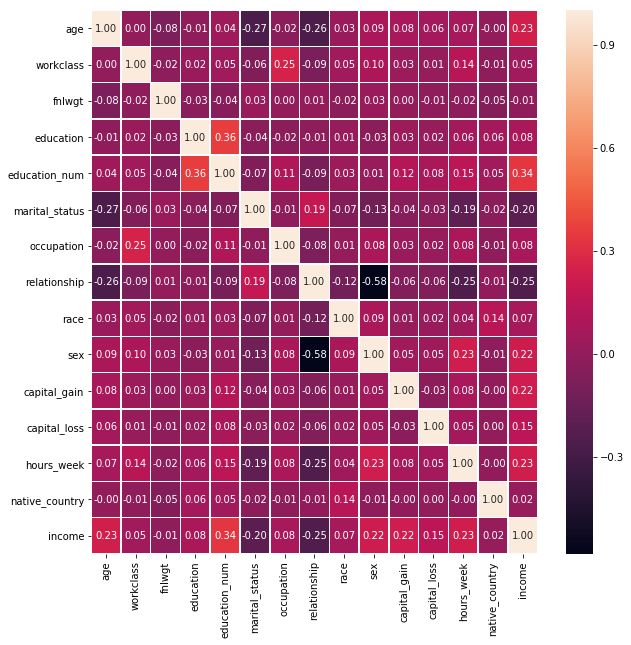

In [107]:
#Correlation Matrix - To revisit our conclusion....
check_train = pd.read_csv(TRAIN_FILE, delimiter=',', header=None, names=label_array)
encodeLabelDataset(check_train,labels_needed)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(check_train.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)